In [4]:
from pyflink.table import EnvironmentSettings, TableEnvironment
import pandas as pd

In [5]:
# Step 1: Create a Flink batch environment
env_settings = EnvironmentSettings.new_instance().in_batch_mode().build()
table_env = TableEnvironment.create(env_settings)

In [6]:

data = pd.read_csv("ratings_sampled.csv")

print(data.head())


   userId  movieId  rating
0  186905     1220     5.0
1  255494     2294     5.0
2  218216     4235     4.0
3  193152      376     3.0
4   13156     5899     4.5


In [7]:
table = table_env.from_pandas(data)
table.get_schema()

root
 |-- userId: BIGINT
 |-- movieId: BIGINT
 |-- rating: DOUBLE

In [8]:
# movieId
movie_counts = data.groupby('movieId').size().reset_index(name='ratings_count')

#movie_counts
print(movie_counts.head())


   movieId  ratings_count
0        1          25584
1        2          10102
2        3           5930
3        4           1166
4        5           5943


In [9]:

num_rows = len(movie_counts)

num_rows_shape = movie_counts.shape[0]

print(f"عدد الصفوف باستخدام len(): {num_rows}")
print(f"عدد الصفوف باستخدام shape: {num_rows_shape}")


عدد الصفوف باستخدام len(): 37140
عدد الصفوف باستخدام shape: 37140


In [10]:
# إنشاء عمود جديد بناءً على عدد التقييمات
movie_counts['has_more_than_1000_ratings'] = movie_counts['ratings_count'].apply(lambda x: 1 if x > 1000 else 0)

# عرض أول خمس نتائج بعد إضافة العمود الجديد
print(movie_counts.head())


   movieId  ratings_count  has_more_than_1000_ratings
0        1          25584                           1
1        2          10102                           1
2        3           5930                           1
3        4           1166                           1
4        5           5943                           1


In [11]:

print(movie_counts.head(20))

print(movie_counts.tail(20))


    movieId  ratings_count  has_more_than_1000_ratings
0         1          25584                           1
1         2          10102                           1
2         3           5930                           1
3         4           1166                           1
4         5           5943                           1
5         6          10725                           1
6         7           5809                           1
7         8            589                           0
8         9           1678                           1
9        10          12612                           1
10       11           7586                           1
11       12           1713                           1
12       13            721                           0
13       14           2581                           1
14       15           1266                           1
15       16           7781                           1
16       17           9296                           1
17       1

In [12]:
from sklearn.model_selection import train_test_split


X = movie_counts[['ratings_count']]  
y = movie_counts['has_more_than_1000_ratings']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")



Training set size: 29712
Test set size: 7428


In [13]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()


model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the first 10 predictions
print("First 10 predictions:", y_pred[:10])

# Display the first 10 actual labels to compare
print("First 10 actual labels:", y_test[:10].values)


First 10 predictions: [0 0 0 1 0 0 0 0 0 0]
First 10 actual labels: [0 0 0 1 0 0 0 0 0 0]


In [14]:
import pandas as pd


predictions = y_pred[:10]  
actual_labels = y_test[:10].values 


results_df = pd.DataFrame({
    'Index': range(1, 11),
    'Prediction': predictions,
    'Actual Label': actual_labels
})


print(results_df)


   Index  Prediction  Actual Label
0      1           0             0
1      2           0             0
2      3           0             0
3      4           1             1
4      5           0             0
5      6           0             0
6      7           0             0
7      8           0             0
8      9           0             0
9     10           0             0


In [15]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6991    0]
 [   0  437]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6991
           1       1.00      1.00      1.00       437

    accuracy                           1.00      7428
   macro avg       1.00      1.00      1.00      7428
weighted avg       1.00      1.00      1.00      7428



1Scatter Plot 

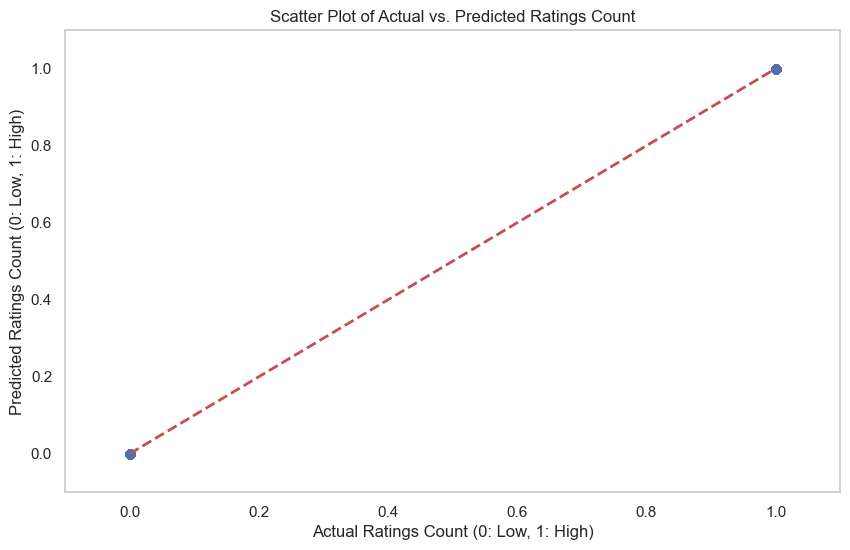

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Actual vs. Predicted Ratings Count')
plt.xlabel('Actual Ratings Count (0: Low, 1: High)')
plt.ylabel('Predicted Ratings Count (0: Low, 1: High)')

# Draw a line for perfect predictions
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)

# Show the plot
plt.grid()
plt.xlim(-0.1, 1.1)  # Adjust limits for better visibility
plt.ylim(-0.1, 1.1)
plt.show()




2

In [18]:
import pandas as pd

# Load the ratings data
ratings = pd.read_csv("ratings_sampled.csv")  # Adjust the path if needed

# Create movie_stats DataFrame by counting ratings for each movieId
movie_stats = ratings.groupby('movieId').size().reset_index(name='ratings_count')

# Display the first few rows of movie_stats to verify
print(movie_stats.head())


   movieId  ratings_count
0        1          25584
1        2          10102
2        3           5930
3        4           1166
4        5           5943


In [19]:
# Set a threshold for categorizing movies
threshold = 1000

# Create a new column for rating categories
movie_stats['rating_category'] = movie_stats['ratings_count'].apply(lambda x: 'High' if x > threshold else 'Low')

# Display the updated movie_stats DataFrame
print(movie_stats.head())


   movieId  ratings_count rating_category
0        1          25584            High
1        2          10102            High
2        3           5930            High
3        4           1166            High
4        5           5943            High


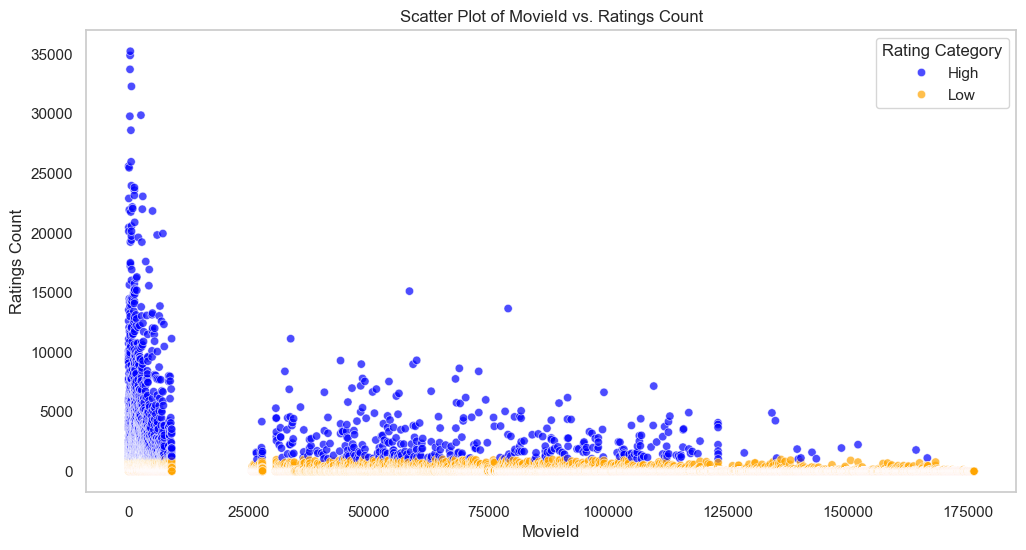

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot with hue based on rating category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movie_stats, x='movieId', y='ratings_count', hue='rating_category', alpha=0.7, palette={'High': 'blue', 'Low': 'orange'})

# Add labels and title
plt.title('Scatter Plot of MovieId vs. Ratings Count')
plt.xlabel('MovieId')
plt.ylabel('Ratings Count')

# Show the legend
plt.legend(title='Rating Category')

# Show the plot
plt.grid()
plt.show()


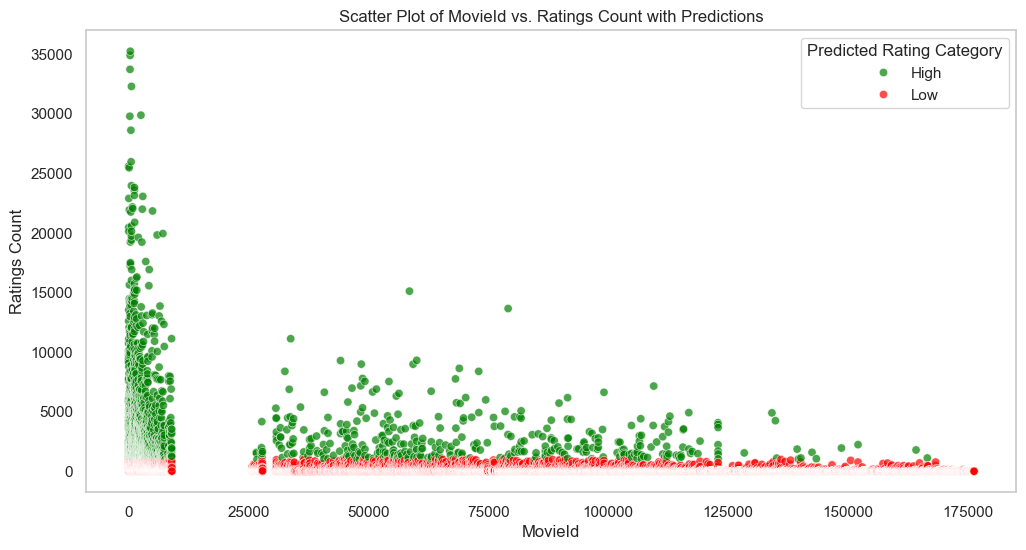

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the movie_stats DataFrame (assuming it has been created earlier)
# Example: movie_stats = pd.read_csv('path_to_your_movie_stats.csv')

# Step 1: Prepare your data (Replace this with your actual DataFrame)
# Assume movie_stats already has 'movieId' and 'ratings_count' columns

# Step 2: Define the threshold and create the label column
threshold = 1000
movie_stats['label'] = movie_stats['ratings_count'].apply(lambda x: 1 if x > threshold else 0)

# Step 3: Prepare features and target variable
X = movie_stats[['ratings_count']]
y = movie_stats['label']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Add predictions to the movie_stats DataFrame
movie_stats['predicted_category'] = model.predict(X)  # Use the entire dataset for predictions
movie_stats['predicted_rating_category'] = movie_stats['predicted_category'].apply(lambda x: 'High' if x == 1 else 'Low')

# Step 8: Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movie_stats, x='movieId', y='ratings_count', hue='predicted_rating_category', alpha=0.7, palette={'High': 'green', 'Low': 'red'})

# Add labels and title
plt.title('Scatter Plot of MovieId vs. Ratings Count with Predictions')
plt.xlabel('MovieId')
plt.ylabel('Ratings Count')

# Show the legend
plt.legend(title='Predicted Rating Category')

# Show the plot
plt.grid()
plt.show()


This confusion matrix heatmap provides a clear visual representation of your model's performance, 
allowing you to see where it performed well and where it made mistakes. This information can be invaluable for assessing the effectiveness of your model and guiding any necessary adjustments.

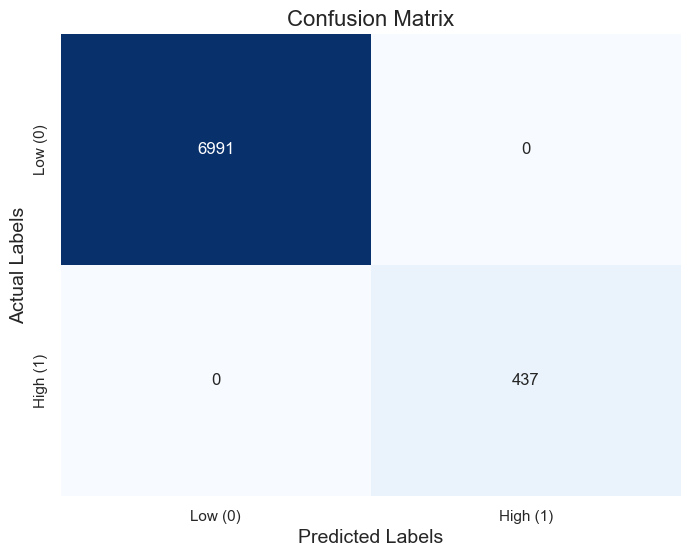

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix for better labeling
cm_df = pd.DataFrame(cm, index=['Low (0)', 'High (1)'], columns=['Low (0)', 'High (1)'])

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)

# Title and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

# Show the plot
plt.show()


The ROC curve and its corresponding AUC value are powerful tools for evaluating the performance 
of a classification model. They help visualize the trade-offs between true positive and false positive rates and provide a comprehensive metric for model evaluation.

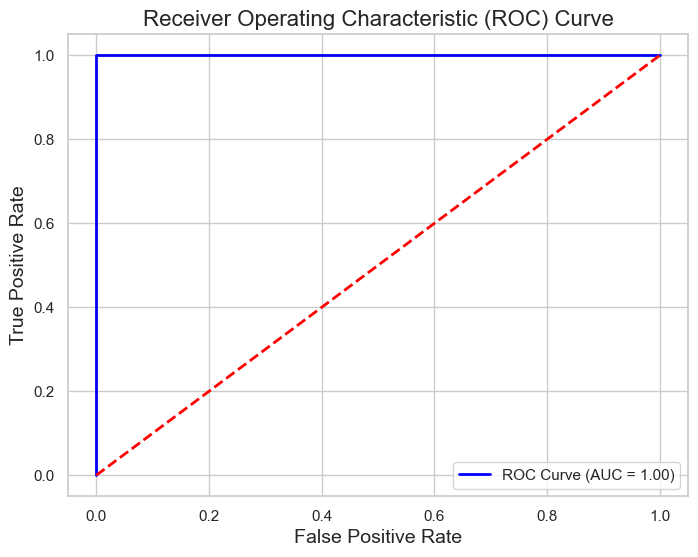

In [23]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Title and labels
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming `movie_stats` contains the 'ratings_count' feature and actual labels
# Split the data into features and labels
X = movie_stats[['ratings_count']]
y = movie_stats['label']

# Step 1: Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Step 2: Generate predicted probabilities
y_prob = log_reg.predict_proba(X)[:, 1]  # Probabilities for the positive class (y=1)

# Step 3: Apply the 0.5 threshold to get predicted labels
y_pred = (y_prob >= 0.5).astype(int)

# Step 4: Create a DataFrame to show features, actual labels, and predicted labels
results_df = pd.DataFrame({
    'ratings_count': movie_stats['ratings_count'],
    'actual_label': y,
    'predicted_label': y_pred,
    'predicted_probability': y_prob
})

# Show the first 10 rows of the table
print(results_df.head(10))


   ratings_count  actual_label  predicted_label  predicted_probability
0          25584             1                1           1.000000e+00
1          10102             1                1           1.000000e+00
2           5930             1                1           1.000000e+00
3           1166             1                1           1.000000e+00
4           5943             1                1           1.000000e+00
5          10725             1                1           1.000000e+00
6           5809             1                1           1.000000e+00
7            589             0                0          2.563917e-261
8           1678             1                1           1.000000e+00
9          12612             1                1           1.000000e+00


ROC-AUC Score: 1.0000


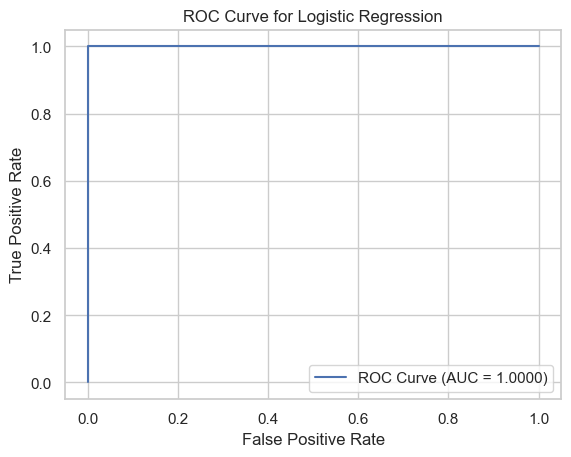

In [25]:
# Step 5: Calculate the ROC-AUC score
roc_auc = roc_auc_score(y, y_prob)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Step 6: Plot the ROC Curve
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


ROC-AUC Score: 1.0000000000


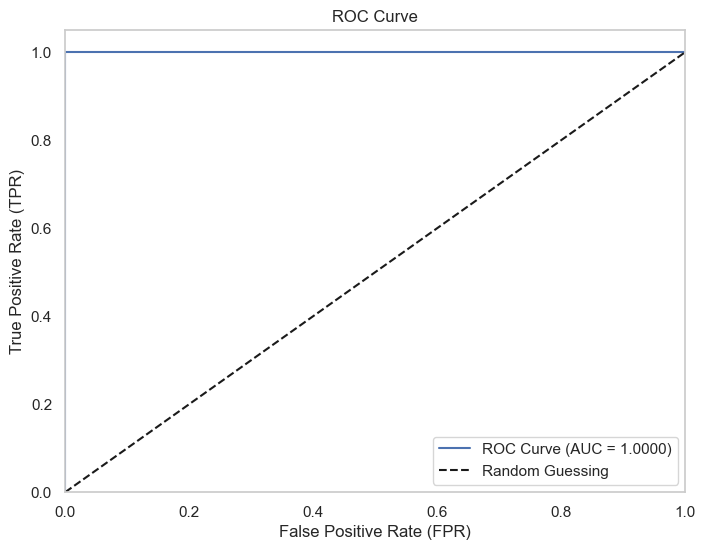

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Calculate the ROC-AUC score
roc_auc = roc_auc_score(y, y_prob)
print(f'ROC-AUC Score: {roc_auc:.10f}')

# Step 2: Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Step 3: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [28]:
table = table_env.from_pandas(results_df)
table.get_schema()

root
 |-- ratings_count: BIGINT
 |-- actual_label: BIGINT
 |-- predicted_label: BIGINT
 |-- predicted_probability: DOUBLE

In [44]:
import pandas as pd

# Load the data into a Pandas DataFrame
df = pd.read_csv('ratings_sampled.csv')

In [46]:
# Save the DataFrame to a CSV file
df.to_csv('savedfile.csv', index=False)

In [49]:
from pyflink.table import TableEnvironment, EnvironmentSettings
from pyflink.datastream import StreamExecutionEnvironment
from pyflink.table.expressions import col

In [50]:
# Set up batch execution environment
env_settings = EnvironmentSettings.in_batch_mode()
table_env = TableEnvironment.create(env_settings)

# Read CSV using Pandas (since you already use Pandas)
import pandas as pd

In [51]:
csv_path = "ratings_sampled.csv"
df = pd.read_csv(csv_path)

In [52]:
# Convert the Pandas DataFrame to a PyFlink Table
table = table_env.from_pandas(df, schema=['userId', 'movieId', 'rating'])

In [53]:
# Register the table as a temporary view in PyFlink
table_env.create_temporary_view("ratings_table", table)

In [55]:
# Print the table schema or perform other operations
print(table.get_schema())


root
 |-- userId: BIGINT
 |-- movieId: BIGINT
 |-- rating: DOUBLE



In [56]:
# Retrieve the table from the temporary view and print its schema
temp_table = table_env.from_path("ratings_table")
print(temp_table.get_schema())


root
 |-- userId: BIGINT
 |-- movieId: BIGINT
 |-- rating: DOUBLE



In [57]:
# Fetch and display a few rows from the table
result = table_env.sql_query("SELECT * FROM ratings_table LIMIT 10")
result.execute().print()


+----------------------+----------------------+--------------------------------+
|               userId |              movieId |                         rating |
+----------------------+----------------------+--------------------------------+
|               186905 |                 1220 |                            5.0 |
|               255494 |                 2294 |                            5.0 |
|               218216 |                 4235 |                            4.0 |
|               193152 |                  376 |                            3.0 |
|                13156 |                 5899 |                            4.5 |
|               210925 |                   52 |                            4.0 |
|               267140 |                 5991 |                            4.0 |
|                21788 |                 3893 |                            3.0 |
|               114760 |                 3089 |                            1.0 |
|               238331 |    

In [58]:
# SQL query to count ratings per movieId
rating_count_query = """
SELECT movieId, COUNT(rating) as rating_count
FROM ratings_table
GROUP BY movieId
"""
rating_count_table = table_env.sql_query(rating_count_query)
rating_count_table.execute().print()


+----------------------+----------------------+
|              movieId |         rating_count |
+----------------------+----------------------+
|                  376 |                 5030 |
|                  903 |                 6588 |
|                  527 |                25963 |
|                30749 |                 4451 |
|                  362 |                 3447 |
|                  380 |                19230 |
|                  434 |                10551 |
|                 3593 |                 1845 |
|                  300 |                 8391 |
|                98809 |                 3503 |
|               111743 |                  341 |
|                91976 |                  530 |
|                42632 |                  567 |
|                 2355 |                 9430 |
|                   70 |                 5859 |
|                 8636 |                 7958 |
|                 2571 |                29872 |
|               140715 |                

In [59]:
# SQL query to add binary label for logistic regression
labeled_query = """
SELECT movieId, rating_count, 
CASE WHEN rating_count > 1000 THEN 1 ELSE 0 END AS has_more_than_1000_ratings
FROM ({}) as rating_data
""".format(rating_count_query)

labeled_table = table_env.sql_query(labeled_query)
labeled_table.execute().print()


+----------------------+----------------------+----------------------------+
|              movieId |         rating_count | has_more_than_1000_ratings |
+----------------------+----------------------+----------------------------+
|                  376 |                 5030 |                          1 |
|                  903 |                 6588 |                          1 |
|                  527 |                25963 |                          1 |
|                30749 |                 4451 |                          1 |
|                  362 |                 3447 |                          1 |
|                  380 |                19230 |                          1 |
|                  434 |                10551 |                          1 |
|                 3593 |                 1845 |                          1 |
|                  300 |                 8391 |                          1 |
|                98809 |                 3503 |                          1 |

In [62]:
# SQL query to count the number of ratings per movieId
rating_count_query = """
SELECT movieId, COUNT(rating) as rating_count
FROM ratings_table
GROUP BY movieId
"""
rating_count_table = table_env.sql_query(rating_count_query)


In [63]:
# SQL query to create a binary label
labeled_query = """
SELECT movieId, rating_count,
CASE WHEN rating_count > 1000 THEN 1 ELSE 0 END AS has_more_than_1000_ratings
FROM ({}) AS rating_data
""".format(rating_count_query)

labeled_table = table_env.sql_query(labeled_query)


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [81]:
X = movie_counts[['ratings_count']]  # Features: number of ratings
y = movie_counts['has_more_than_1000_ratings']  # Target: classification (0 or 1)


In [83]:
#Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Display the size of training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Step 4: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)  # Binary predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 6: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Training set size: 29712
Test set size: 7428
Confusion Matrix:
[[6991    0]
 [   0  437]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6991
           1       1.00      1.00      1.00       437

    accuracy                           1.00      7428
   macro avg       1.00      1.00      1.00      7428
weighted avg       1.00      1.00      1.00      7428


ROC-AUC Score: 1.0


In [84]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the first 10 predictions
print("First 10 predictions:", y_pred[:10])

# Display the first 10 actual labels to compare
print("First 10 actual labels:", y_test[:10].values)

First 10 predictions: [0 0 0 1 0 0 0 0 0 0]
First 10 actual labels: [0 0 0 1 0 0 0 0 0 0]


In [85]:
import pandas as pd

# افترض أن لديك التنبؤات والقيم الحقيقية
predictions = y_pred[:10]  # أول 10 تنبؤات
actual_labels = y_test[:10].values  # أول 10 قيم حقيقية

# إنشاء DataFrame من التنبؤات والقيم الحقيقية
results_df = pd.DataFrame({
    'Index': range(1, 11),
    'Prediction': predictions,
    'Actual Label': actual_labels
})

# عرض الجدول
print(results_df)

   Index  Prediction  Actual Label
0      1           0             0
1      2           0             0
2      3           0             0
3      4           1             1
4      5           0             0
5      6           0             0
6      7           0             0
7      8           0             0
8      9           0             0
9     10           0             0


In [86]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [87]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[6991    0]
 [   0  437]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6991
           1       1.00      1.00      1.00       437

    accuracy                           1.00      7428
   macro avg       1.00      1.00      1.00      7428
weighted avg       1.00      1.00      1.00      7428



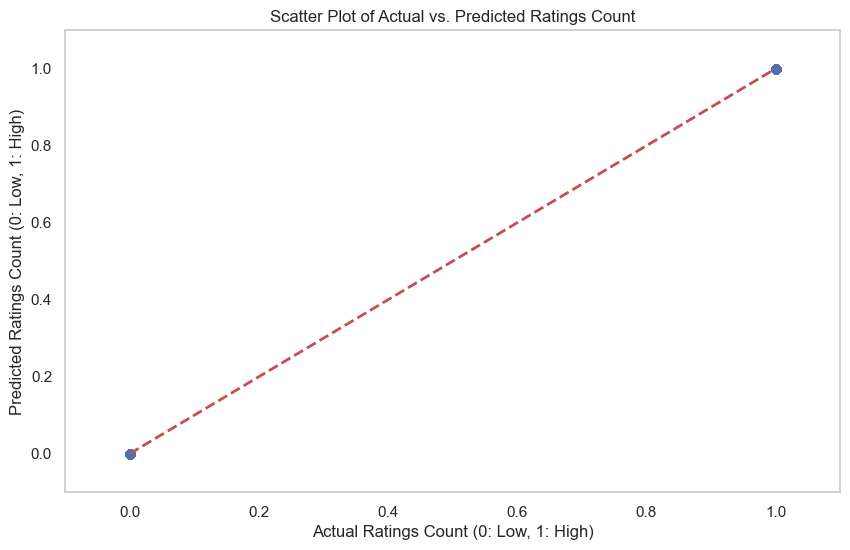

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Actual vs. Predicted Ratings Count')
plt.xlabel('Actual Ratings Count (0: Low, 1: High)')
plt.ylabel('Predicted Ratings Count (0: Low, 1: High)')

# Draw a line for perfect predictions
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)

# Show the plot
plt.grid()
plt.xlim(-0.1, 1.1)  # Adjust limits for better visibility
plt.ylim(-0.1, 1.1)
plt.show()




In [89]:
import pandas as pd

# Load the ratings data
ratings = pd.read_csv("ratings_sampled.csv")  # Adjust the path if needed

# Create movie_stats DataFrame by counting ratings for each movieId
movie_stats = ratings.groupby('movieId').size().reset_index(name='ratings_count')

# Display the first few rows of movie_stats to verify
print(movie_stats.head())

   movieId  ratings_count
0        1          25584
1        2          10102
2        3           5930
3        4           1166
4        5           5943


In [90]:
# Set a threshold for categorizing movies
threshold = 1000

# Create a new column for rating categories
movie_stats['rating_category'] = movie_stats['ratings_count'].apply(lambda x: 'High' if x > threshold else 'Low')

# Display the updated movie_stats DataFrame
print(movie_stats.head())


   movieId  ratings_count rating_category
0        1          25584            High
1        2          10102            High
2        3           5930            High
3        4           1166            High
4        5           5943            High


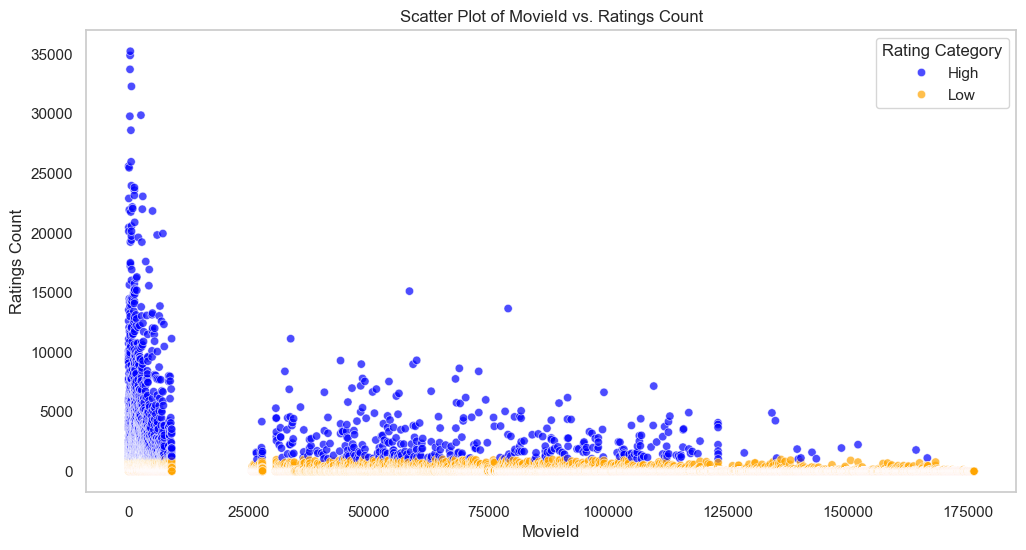

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot with hue based on rating category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movie_stats, x='movieId', y='ratings_count', hue='rating_category', alpha=0.7, palette={'High': 'blue', 'Low': 'orange'})

# Add labels and title
plt.title('Scatter Plot of MovieId vs. Ratings Count')
plt.xlabel('MovieId')
plt.ylabel('Ratings Count')

# Show the legend
plt.legend(title='Rating Category')

# Show the plot
plt.grid()
plt.show()


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the movie_stats DataFrame (assuming it has been created earlier)
# Example: movie_stats = pd.read_csv('path_to_your_movie_stats.csv')

# Step 1: Prepare your data (Replace this with your actual DataFrame)
# Assume movie_stats already has 'movieId' and 'ratings_count' columns

# Step 2: Define the threshold and create the label column
threshold = 1000
movie_stats['label'] = movie_stats['ratings_count'].apply(lambda x: 1 if x > threshold else 0)

# Step 3: Prepare features and target variable
X = movie_stats[['ratings_count']]
y = movie_stats['label']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

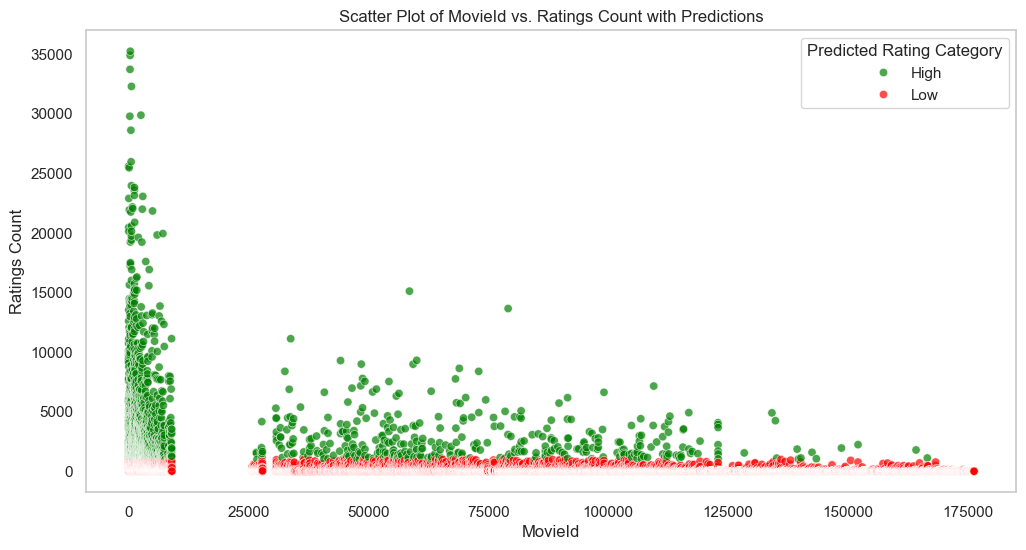

In [93]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Add predictions to the movie_stats DataFrame
movie_stats['predicted_category'] = model.predict(X)  # Use the entire dataset for predictions
movie_stats['predicted_rating_category'] = movie_stats['predicted_category'].apply(lambda x: 'High' if x == 1 else 'Low')

# Step 8: Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movie_stats, x='movieId', y='ratings_count', hue='predicted_rating_category', alpha=0.7, palette={'High': 'green', 'Low': 'red'})

# Add labels and title
plt.title('Scatter Plot of MovieId vs. Ratings Count with Predictions')
plt.xlabel('MovieId')
plt.ylabel('Ratings Count')

# Show the legend
plt.legend(title='Predicted Rating Category')

# Show the plot
plt.grid()
plt.show()

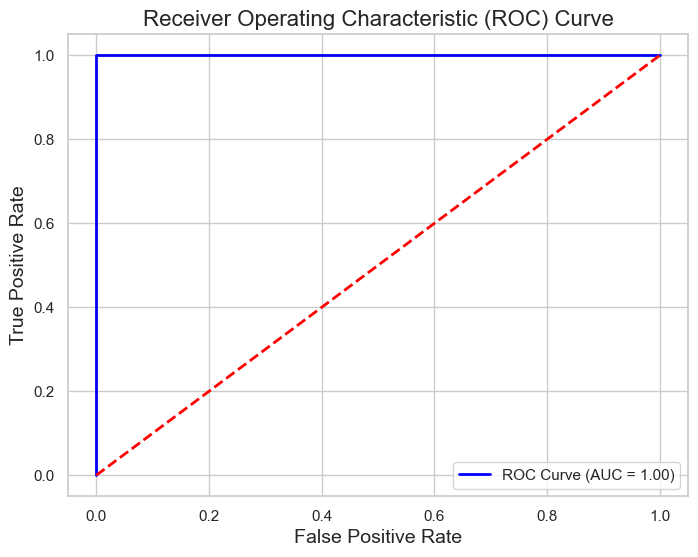

In [94]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Title and labels
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming `movie_stats` contains the 'ratings_count' feature and actual labels
# Split the data into features and labels
X = movie_stats[['ratings_count']]
y = movie_stats['label']

# Step 1: Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Step 2: Generate predicted probabilities
y_prob = log_reg.predict_proba(X)[:, 1]  # Probabilities for the positive class (y=1)

# Step 3: Apply the 0.5 threshold to get predicted labels
y_pred = (y_prob >= 0.5).astype(int)

# Step 4: Create a DataFrame to show features, actual labels, and predicted labels
results_df = pd.DataFrame({
    'ratings_count': movie_stats['ratings_count'],
    'actual_label': y,
    'predicted_label': y_pred,
    'predicted_probability': y_prob
})

# Show the first 10 rows of the table
print(results_df.head(10))


   ratings_count  actual_label  predicted_label  predicted_probability
0          25584             1                1           1.000000e+00
1          10102             1                1           1.000000e+00
2           5930             1                1           1.000000e+00
3           1166             1                1           1.000000e+00
4           5943             1                1           1.000000e+00
5          10725             1                1           1.000000e+00
6           5809             1                1           1.000000e+00
7            589             0                0          2.563917e-261
8           1678             1                1           1.000000e+00
9          12612             1                1           1.000000e+00
